## Summarize the history of Mooring Site (M2)

- mooring data pulled from ERDDAP (preliminary and/or final)   
- currently on downdraft


In [1]:
from erddapy import ERDDAP
import pandas as pd
import numpy as np
import datetime

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import YearLocator, WeekdayLocator, MonthLocator, DayLocator, HourLocator, DateFormatter

import cmocean

In [2]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import YearLocator, WeekdayLocator, MonthLocator, DayLocator, HourLocator, DateFormatter
import matplotlib.ticker as ticker

import cmocean
### specify primary bulk figure parameters
fontsize = 10
labelsize = 10
#plotstyle = 'seaborn'
max_xticks = 10
plt.style.use('seaborn-ticks')
mpl.rcParams['svg.fonttype'] = 'none'
mpl.rcParams['ps.fonttype'] = 42 #truetype/type2 fonts instead of type3
mpl.rcParams['pdf.fonttype'] = 42 #truetype/type2 fonts instead of type3
mpl.rcParams['axes.grid'] = False
mpl.rcParams['axes.edgecolor'] = 'black'
mpl.rcParams['axes.linewidth'] = 1.5
mpl.rcParams['axes.labelcolor'] = 'black'
mpl.rcParams['grid.linestyle'] = '--'
mpl.rcParams['grid.linestyle'] = '--'
mpl.rcParams['xtick.major.size'] = 4
mpl.rcParams['xtick.minor.size'] = 2
mpl.rcParams['xtick.major.width'] = 2
mpl.rcParams['xtick.minor.width'] = 0.5
mpl.rcParams['ytick.major.size'] = 4
mpl.rcParams['ytick.minor.size'] = 2
mpl.rcParams['ytick.major.width'] = 2
mpl.rcParams['ytick.minor.width'] = 0.5
mpl.rcParams['ytick.direction'] = 'out'
mpl.rcParams['xtick.direction'] = 'out'
mpl.rcParams['ytick.color'] = 'black'
mpl.rcParams['xtick.color'] = 'black'

In [5]:
server_url = 'http://downdraft.pmel.noaa.gov:8080/erddap'

Lets find all erddap datasets that would be associated with M2:   
    - bsm-2a, bs-2c, bsp-2a, bsp-2c, bsitaepr-2a

In [4]:
e = ERDDAP(server=server_url)
df_1 = pd.read_csv(e.get_search_url(response='csv', search_for='bs2'))
e = ERDDAP(server=server_url)
df_2 = pd.read_csv(e.get_search_url(response='csv', search_for='bsm2'))
e = ERDDAP(server=server_url)
df_3 = pd.read_csv(e.get_search_url(response='csv', search_for='bsitae'))

df = pd.concat([df_1,df_2,df_3])
print(df['Dataset ID'].values)

URLError: <urlopen error [Errno 60] Operation timed out>

In [5]:
from requests.exceptions import HTTPError

dfs = {}
for dataset_id in df['Dataset ID'].values:
    print(dataset_id)
    try:
        d = ERDDAP(server=server_url,
            protocol='tabledap',
            response='csv'
        )
        d.dataset_id=dataset_id
        d.variables=variables
    except HTTPError:
        print('Failed to generate url {}'.format(dataset_id))

    try:
        df_m = d.to_pandas(
                    index_col='time (UTC)',
                    parse_dates=True,
                    skiprows=(1,)  # units information can be dropped.
                    )
        df_m.sort_index(inplace=True)
        df_m.columns = [x[1].split()[0] for x in enumerate(df_m.columns)]
        
        #-9999 and 1e35 are missing values... but erddap doesn't catch the -9999 yet 
        #and some 1e35 are off a bit
        df_m['depth'][(df_m.depth == -9999)] = np.nan # only in pressure field
        dfs.update({dataset_id:df_m})
    except:
        pass


datasets_Mooring_02bs2c_final


/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


datasets_Mooring_03bs2c_final
datasets_Mooring_04bs2c_final
datasets_Mooring_05bs2c_final
datasets_Mooring_06bs2c_final
datasets_Mooring_07bs2c_final


/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3254: DtypeWarning: Columns (11) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


datasets_Mooring_08bs2c_final
datasets_Mooring_11bs2c_final
datasets_Mooring_12bs2c_final
datasets_Mooring_13bs2c_final
datasets_Mooring_14bs2c_final
datasets_Mooring_15bs2c_final
datasets_Mooring_16bs2c_final
datasets_Mooring_17bs2c_final
datasets_Mooring_18bs2c_final
datasets_Mooring_96bs2a_final
datasets_Mooring_96bs2b_final
datasets_Mooring_96bs2c_final


/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3254: DtypeWarning: Columns (11,12) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


datasets_Mooring_97bs2a_final
datasets_Mooring_97bs2b_final
datasets_Mooring_97bs2c_final
datasets_Mooring_98bs2a_final
datasets_Mooring_98bs2b_final
datasets_Mooring_98bs2c_final
datasets_Mooring_99bs2a_final
datasets_Mooring_99bs2c_final
datasets_Mooring_14bs2c_preliminary
datasets_Mooring_15bs2c_preliminary
datasets_Mooring_16bs2c_preliminary
datasets_Mooring_17bs2c_preliminary
datasets_Mooring_18bs2c_preliminary
datasets_Mooring_01bs2c_final
datasets_Mooring_09bs2c_final
datasets_Mooring_10bs2c_final
datasets_Mooring_02bsm2a_final
datasets_Mooring_03bsm2a_final
datasets_Mooring_04bsm2a_final
datasets_Mooring_05bsm2a_final
datasets_Mooring_06bsm2a_final
datasets_Mooring_07bsm2a_final
datasets_Mooring_08bsm2a_final
datasets_Mooring_11bsm2a_final
datasets_Mooring_12bsm2a_final
datasets_Mooring_13bsm2a_final
datasets_Mooring_14bsm2a_final
datasets_Mooring_15bsm2a_final
datasets_Mooring_16bsm2a_final
datasets_Mooring_17bsm2a_final
datasets_Mooring_18bsm2a_final


/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3254: DtypeWarning: Columns (12) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


datasets_Mooring_19bsm2a_final
datasets_Mooring_95bsm2a_final
datasets_Mooring_96bsm2a_final
datasets_Mooring_97bsm2a_final
datasets_Mooring_98bsm2a_final
datasets_Mooring_99bsm2a_final
datasets_Mooring_14bsm2a_preliminary
datasets_Mooring_15bsm2a_preliminary
datasets_Mooring_16bsm2a_preliminary
datasets_Mooring_17bsm2a_preliminary
datasets_Mooring_18bsm2a_preliminary
datasets_Mooring_19bsm2a_preliminary
datasets_Mooring_00bsm2a_final
datasets_Mooring_01bsm2a_final
datasets_Mooring_09bsm2a_final
datasets_Mooring_10bsm2a_final
datasets_Mooring_19bsitaepr2a_final
datasets_Mooring_19bsitaepr2a_preliminary
erddap_4fd3_fb30_b89f
erddap_18bsitaepr2a_prawler
erddap_19bsitaepr2a_prawler
erddap_18bsitaepr2a_met
erddap_19bsitaepr2a_met
erddap_17bsitae_prawler


datasets_Mooring_02bs2c_final:146
datasets_Mooring_03bs2c_final:211
datasets_Mooring_04bs2c_final:205
datasets_Mooring_05bs2c_final:208
datasets_Mooring_06bs2c_final:210
datasets_Mooring_07bs2c_final:223
datasets_Mooring_08bs2c_final:213
datasets_Mooring_11bs2c_final:224
datasets_Mooring_12bs2c_final:240
datasets_Mooring_13bs2c_final:73
datasets_Mooring_14bs2c_final:193
datasets_Mooring_15bs2c_final:219
datasets_Mooring_16bs2c_final:209
datasets_Mooring_17bs2c_final:210
datasets_Mooring_18bs2c_final:204
datasets_Mooring_96bs2a_final:67
datasets_Mooring_96bs2b_final:68
datasets_Mooring_96bs2c_final:153
datasets_Mooring_97bs2a_final:38
datasets_Mooring_97bs2b_final:58
datasets_Mooring_97bs2c_final:156
datasets_Mooring_98bs2a_final:50
datasets_Mooring_98bs2b_final:50
datasets_Mooring_98bs2c_final:203
datasets_Mooring_99bs2a_final:75
datasets_Mooring_99bs2c_final:794
datasets_Mooring_14bs2c_preliminary:330
datasets_Mooring_15bs2c_preliminary:350
datasets_Mooring_16bs2c_preliminary:309
data

(728294.0, 737565.0)

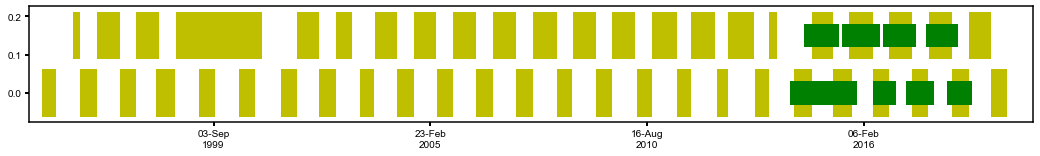

In [6]:
fig = plt.figure(1,figsize=(18,2.125))
ax1 = plt.subplot2grid((1, 1), (0, 0), colspan=1, rowspan=1)
for dfn, df in dfs.items():
    if 'final' in dfn:
        if 'bsm2a' in dfn:
            offset = 0
            duration = (df.last('s').index[0]-df.first('s').index[0]).days
            print(f"{dfn}:{duration}")
            ax1.barh(offset,duration,.125,left=df.first('s').index[0].to_pydatetime(),
                     color='y',label=dfn) #inital
        elif 'bs2' in dfn:
            offset = .15
            duration = (df.last('s').index[0]-df.first('s').index[0]).days
            print(f"{dfn}:{duration}")
            ax1.barh(offset,duration,.125,left=df.first('s').index[0].to_pydatetime(),
                     color='y',label=dfn) #inital            
    elif 'preliminary' in dfn:
        if 'bsm2a' in dfn:
            offset = 0
            duration = (df.last('s').index[0]-df.first('s').index[0]).days
            if duration > 500:
                continue
            print(f"{dfn}:{duration}")
            ax1.barh(offset,duration,.0625,left=df.first('s').index[0].to_pydatetime(),
                     color='g',label=dfn) #inital
        elif 'bs2' in dfn:
            offset = .15
            duration = (df.last('s').index[0]-df.first('s').index[0]).days
            if duration > 500:
                continue
            print(f"{dfn}:{duration}")
            ax1.barh(offset,duration,.0625,left=df.first('s').index[0].to_pydatetime(),
                     color='g',label=dfn) #inital        
xfmt = mdates.DateFormatter('%d-%b\n%Y')
ax1.xaxis.set_major_formatter(xfmt)
ax1.set_xlim([datetime.date(1995,1,1),datetime.date.today()])

datasets_Mooring_02bs2c_final:146
datasets_Mooring_03bs2c_final:211
datasets_Mooring_04bs2c_final:205
datasets_Mooring_05bs2c_final:208
datasets_Mooring_06bs2c_final:210
datasets_Mooring_07bs2c_final:223
datasets_Mooring_08bs2c_final:213
datasets_Mooring_11bs2c_final:224
datasets_Mooring_12bs2c_final:240
datasets_Mooring_13bs2c_final:73
datasets_Mooring_14bs2c_final:193
datasets_Mooring_15bs2c_final:219
datasets_Mooring_16bs2c_final:209
datasets_Mooring_17bs2c_final:210
datasets_Mooring_18bs2c_final:204
datasets_Mooring_96bs2a_final:67
datasets_Mooring_96bs2b_final:68
datasets_Mooring_96bs2c_final:153
datasets_Mooring_97bs2a_final:38
datasets_Mooring_97bs2b_final:58
datasets_Mooring_97bs2c_final:156
datasets_Mooring_98bs2a_final:50
datasets_Mooring_98bs2b_final:50
datasets_Mooring_98bs2c_final:203
datasets_Mooring_99bs2a_final:75
datasets_Mooring_99bs2c_final:794
datasets_Mooring_01bs2c_final:207
datasets_Mooring_09bs2c_final:215
datasets_Mooring_10bs2c_final:225
datasets_Mooring_02bsm

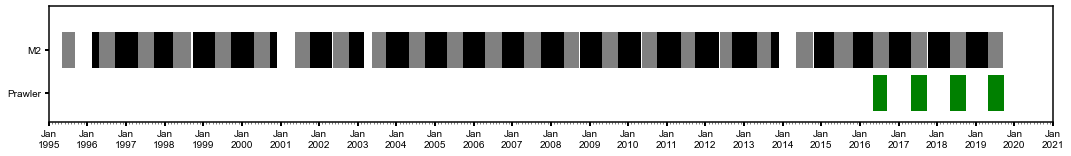

In [7]:
fig = plt.figure(1,figsize=(18,2.125))
ax1 = plt.subplot2grid((1, 1), (0, 0), colspan=1, rowspan=1)
for dfn, df in dfs.items():
    if 'final' in dfn:
        if 'bsm2a' in dfn:
            offset = 0
            duration = (df.last('s').index[0]-df.first('s').index[0]).days
            print(f"{dfn}:{duration}")
            ax1.barh(offset,duration,.125,left=df.first('s').index[0].to_pydatetime(),
                     color='grey',label=dfn) #inital
        elif ('bs2' in dfn):
            offset = 0
            duration = (df.last('s').index[0]-df.first('s').index[0]).days
            print(f"{dfn}:{duration}")
            ax1.barh(offset,duration,.125,left=df.first('s').index[0].to_pydatetime(),
                     color='k',label=dfn) #inital 
    elif 'erddap' in dfn:
        offset = -.15
        df = df[~df.index.isnull()]
        duration = (df.last('s').index[0]-df.first('s').index[0]).days
        print(f"{dfn}:{duration}")
        ax1.barh(offset,duration,.125,left=df.first('s').index[0].to_pydatetime(),
                 color='g',label=dfn) #inital 
            
xfmt = mdates.DateFormatter('%b\n%Y')
ax1.xaxis.set_major_formatter(xfmt)
#ax1.set_xlim([datetime.date(1995,1,1),datetime.date.today()])
ax1.set_xlim([datetime.date(1995,1,1),datetime.date(2021,1,1)])
ax1.set_ylim([-.25,.15])
plt.yticks([0,-.15],['M2','Prawler'])

ax1.xaxis.set_major_locator(YearLocator())
ax1.xaxis.set_minor_locator(MonthLocator())

In [8]:
df.columns

Index(['profileid', 'Chlorophyll', 'Oxy_Sat', 'Temperature', 'Oxy_Temperature',
       'Salinity', 'depth', 'SigmaT', 'Turbidity', 'Oxy_Conc', 'longitude',
       'latitude'],
      dtype='object')

/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


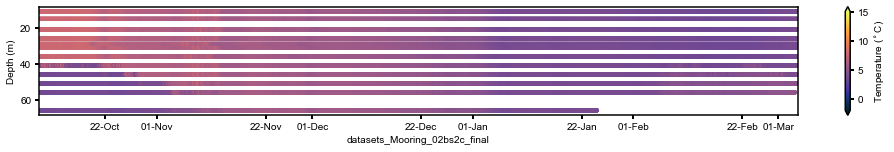

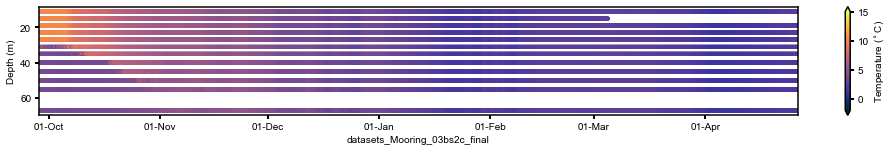

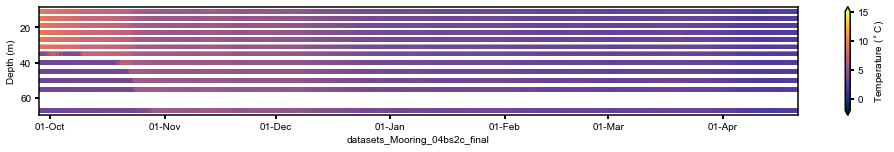

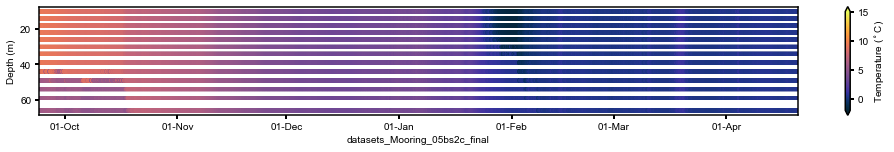

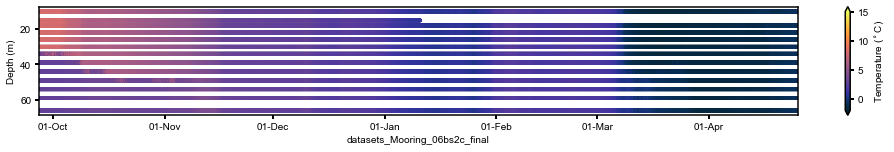

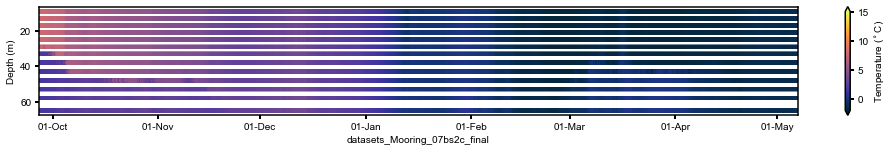

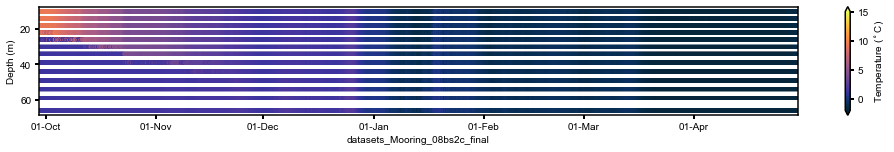

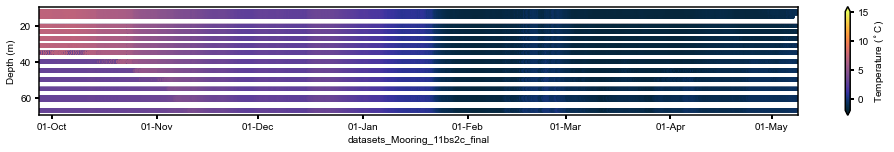

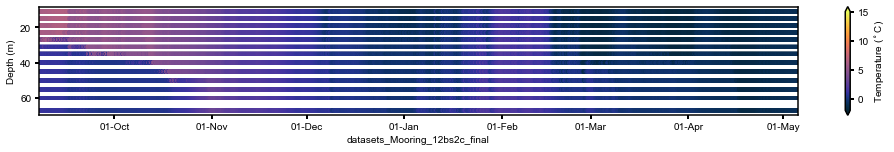

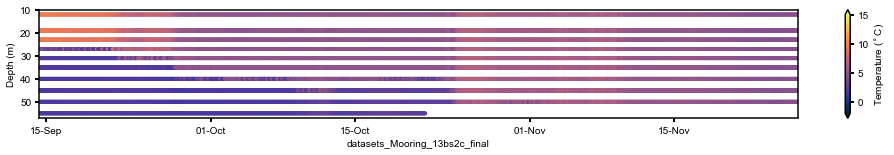

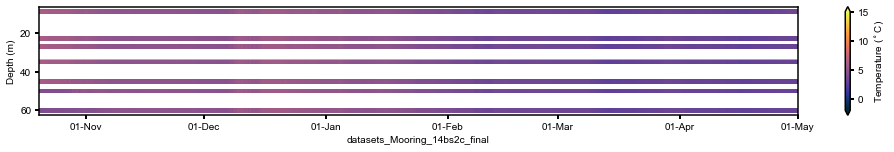

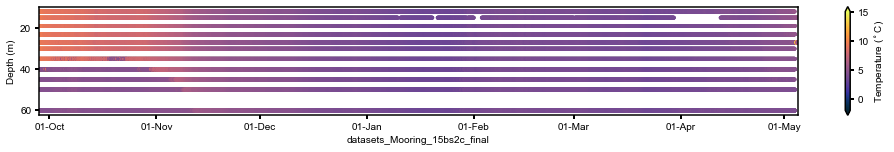

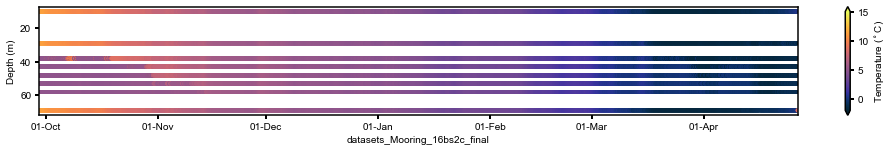

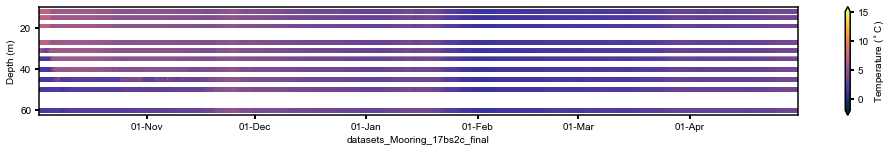

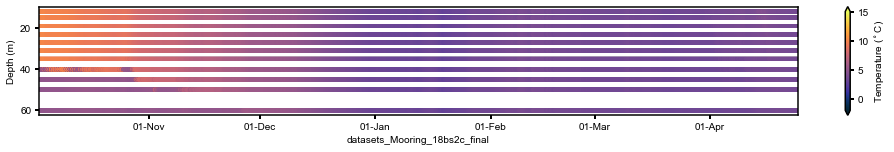

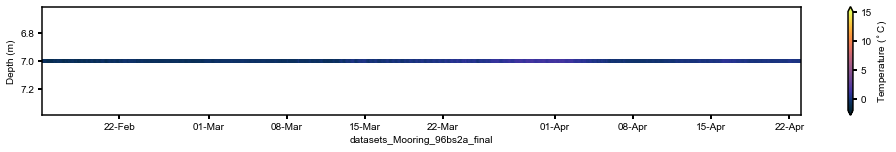

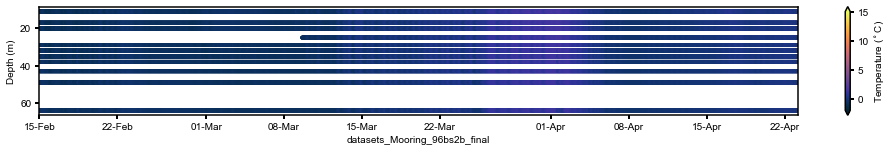

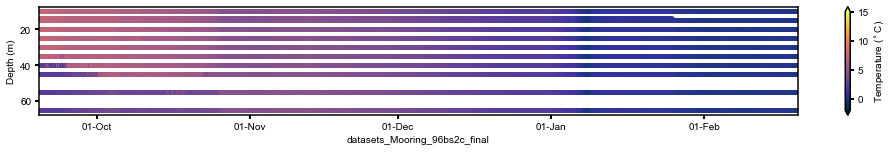

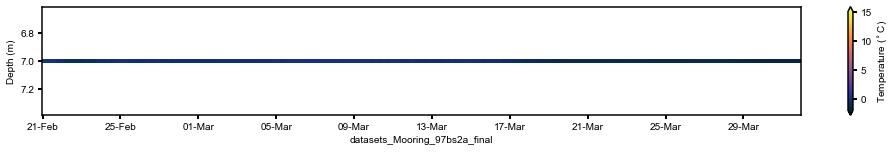

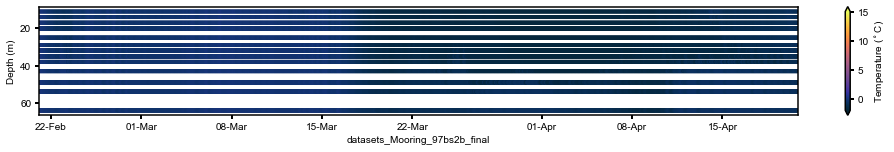

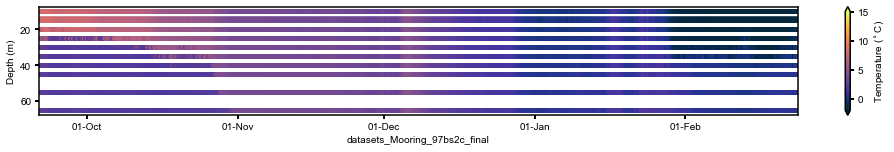

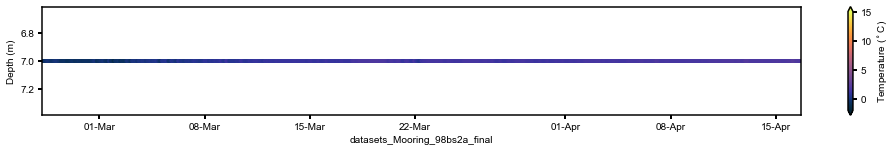

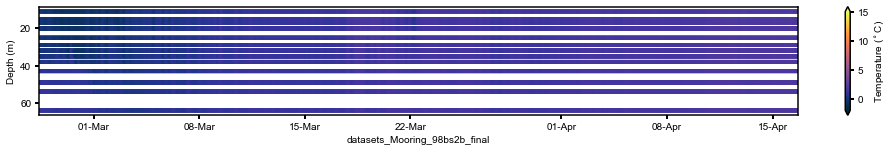

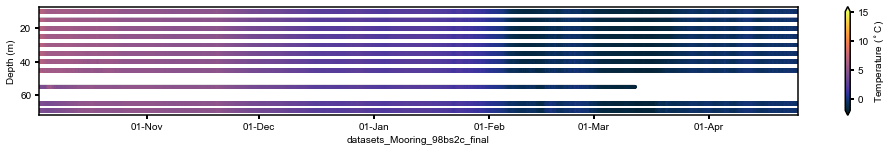

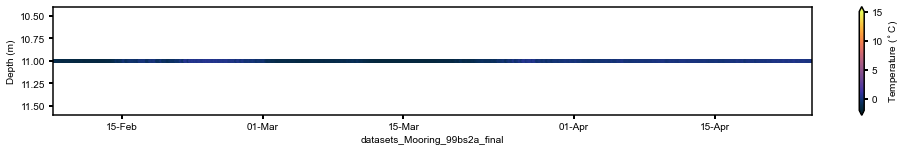

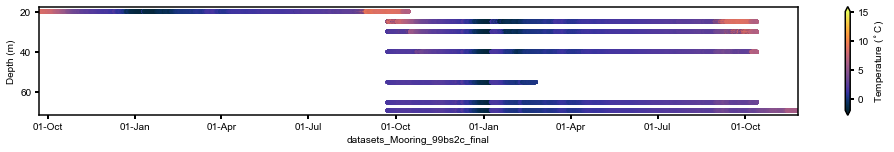

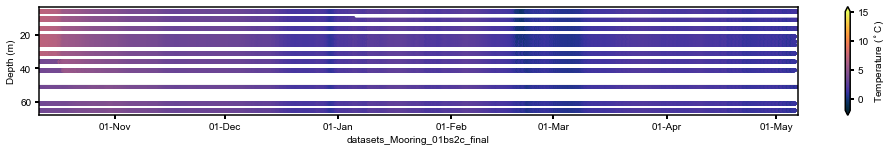

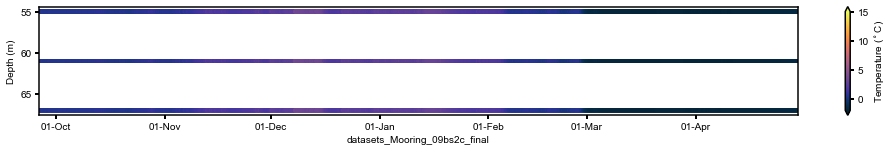

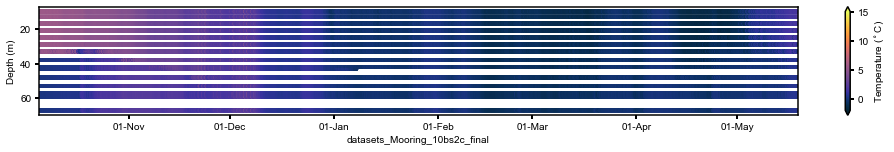

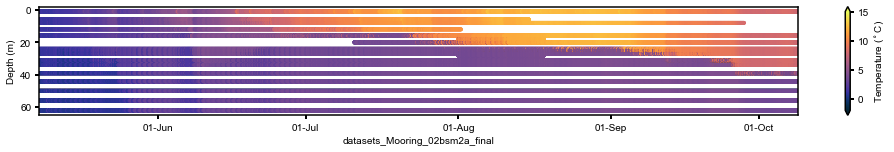

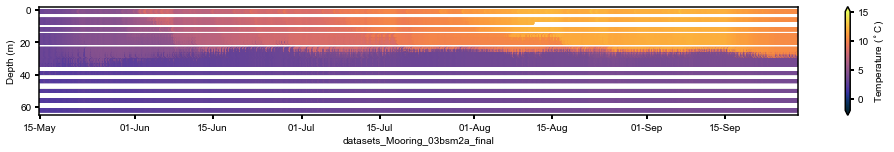

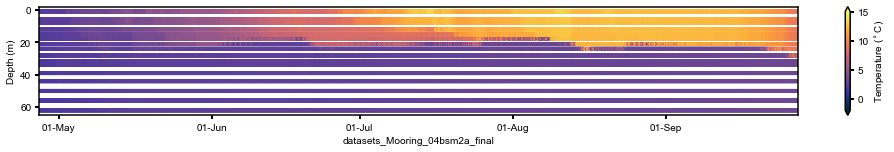

ConversionError: Failed to convert value(s) to axis units: masked_array(data=[--, --, --, ..., --, --, --],
             mask=[ True,  True,  True, ...,  True,  True,  True],
       fill_value=1e+20,
            dtype=float64)

<Figure size 1224x144 with 2 Axes>

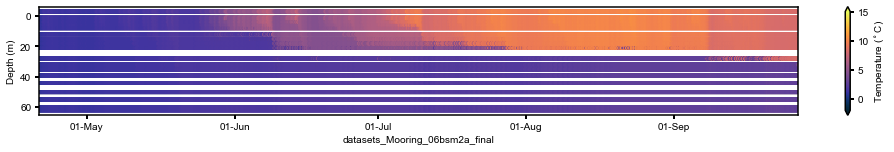

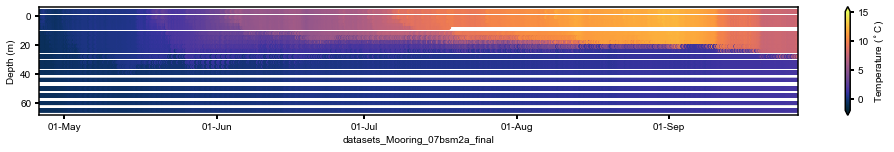

ConversionError: Failed to convert value(s) to axis units: masked_array(data=[--, --, --, ..., --, --, --],
             mask=[ True,  True,  True, ...,  True,  True,  True],
       fill_value=1e+20,
            dtype=float64)

<Figure size 1224x144 with 2 Axes>

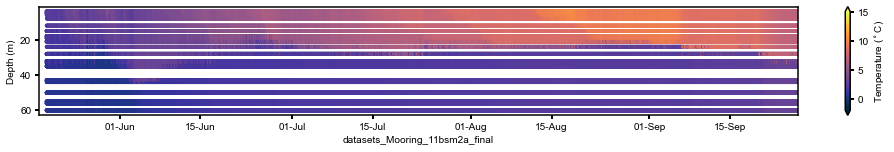

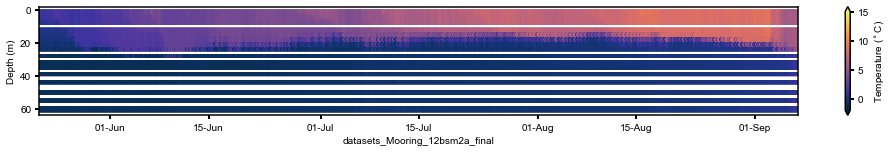

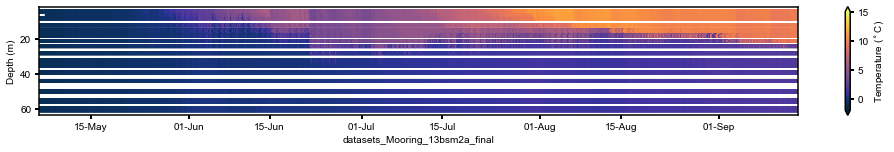

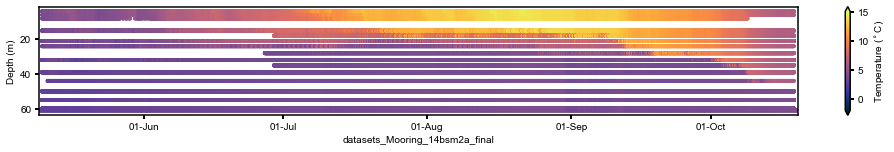

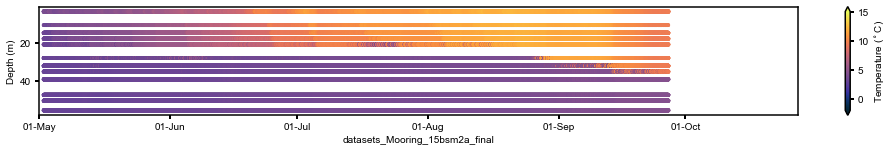

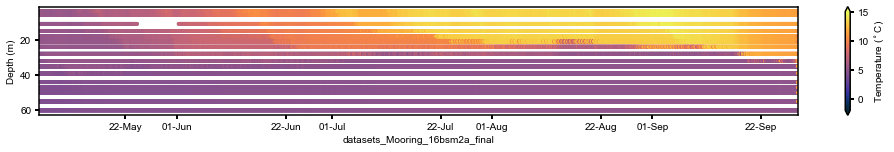

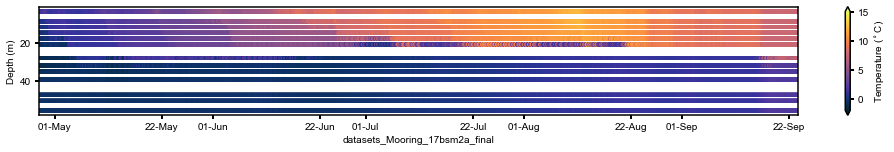

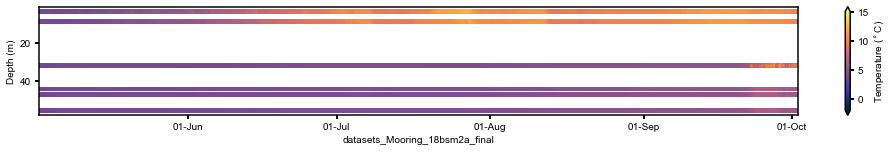

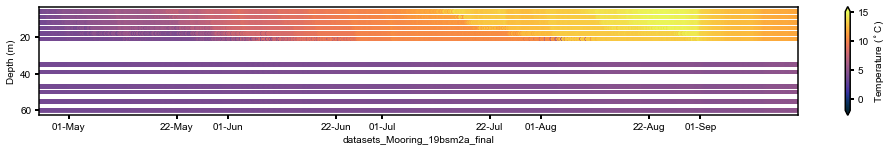

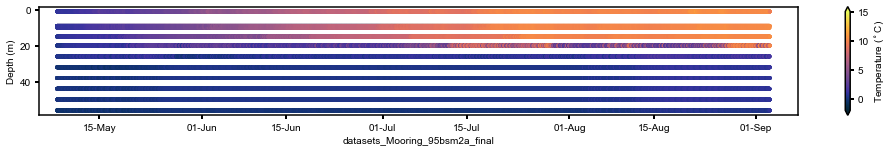

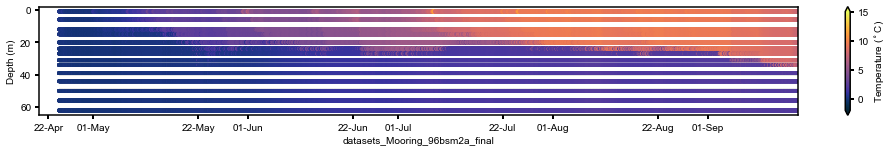

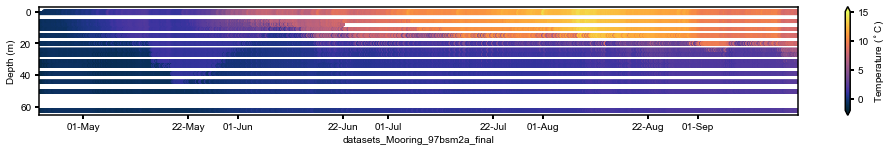

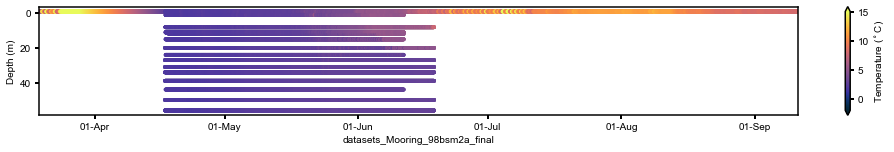

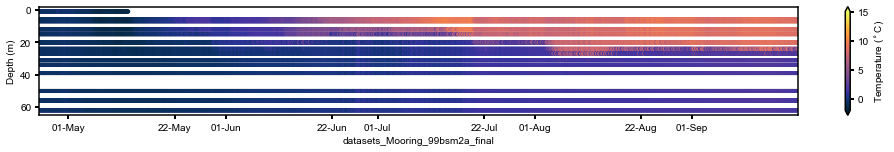

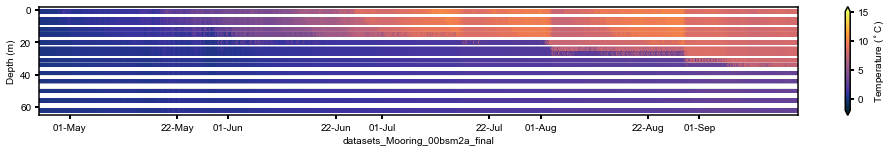

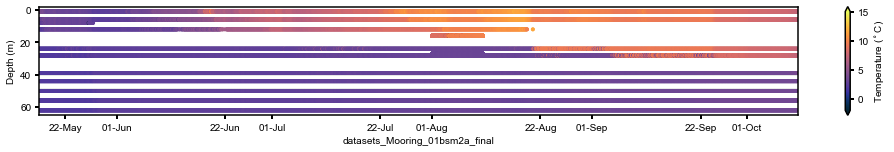

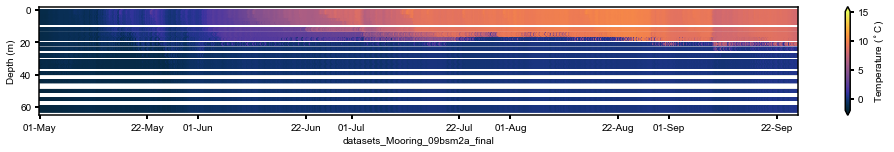

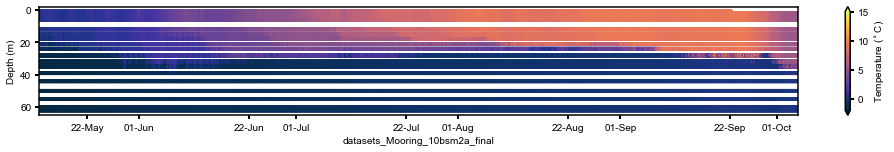

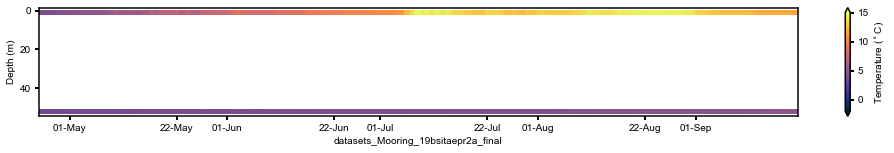

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import cmocean

for dfn, df in dfs.items():
    if 'final' in dfn:
        fig, ax = plt.subplots(figsize=(17, 2))
        df['temperature'][df['temperature'] >= 1e34] = np.nan
        cs = ax.scatter(df.index, df['depth'], s=15, c=df['temperature'], 
                        marker='o', edgecolor='none', vmin=-2, vmax=15, cmap=cmocean.cm.thermal)

        ax.invert_yaxis()
        try:
            ax.set_xlim(df.index[0], df.index[-1])

        
            xfmt = mdates.DateFormatter('%d-%b')
            ax.xaxis.set_major_formatter(xfmt)
        except:
            pass
        cbar = fig.colorbar(cs, orientation='vertical', extend='both')
        cbar.ax.set_ylabel('Temperature ($^\circ$C)')
        ax.set_ylabel('Depth (m)')
        ax.set_xlabel(dfn)

        #fig.savefig(dfn+'.png',dpi=300)


datasets_Mooring_11bs2c_final
datasets_Mooring_12bs2c_final
datasets_Mooring_13bs2c_final
datasets_Mooring_14bs2c_final
datasets_Mooring_15bs2c_final
datasets_Mooring_16bs2c_final
datasets_Mooring_17bs2c_final
datasets_Mooring_18bs2c_final
datasets_Mooring_10bs2c_final
datasets_Mooring_11bsm2a_final
datasets_Mooring_12bsm2a_final
datasets_Mooring_13bsm2a_final
datasets_Mooring_14bsm2a_final
datasets_Mooring_15bsm2a_final
datasets_Mooring_16bsm2a_final
datasets_Mooring_17bsm2a_final
datasets_Mooring_18bsm2a_final
datasets_Mooring_19bsm2a_final
datasets_Mooring_10bsm2a_final


Text(0, 0.5, 'Depth (m)')

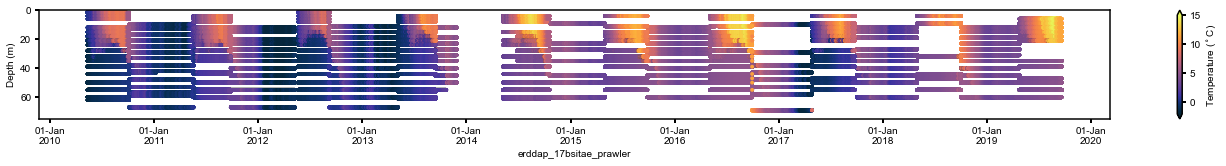

In [10]:
fig, ax = plt.subplots(figsize=(24, 2))

for dfn, df in dfs.items():
    if ('final' in dfn) and (not 'itae' in dfn) and ('_1' in dfn):
        print(dfn)
        try:
            cs = ax.scatter(df.index, df['depth'], s=15, c=df['temperature'], 
                        marker='o', edgecolor='none', vmin=-2, vmax=15, cmap=cmocean.cm.thermal)
        except:
            pass
        
    ax.set_ylim([0,75])
    ax.invert_yaxis()
    #ax.set_xlim(df.index[0], df.index[-1])
    xfmt = mdates.DateFormatter('%d-%b\n%Y')
    ax.xaxis.set_major_formatter(xfmt)
    ax.set_xlabel(dfn)

cbar = fig.colorbar(cs, orientation='vertical', extend='both')
cbar.ax.set_ylabel('Temperature ($^\circ$C)')
ax.set_ylabel('Depth (m)')



datasets_Mooring_04bs2c_final
datasets_Mooring_05bs2c_final
datasets_Mooring_06bs2c_final


/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


datasets_Mooring_07bs2c_final
datasets_Mooring_08bs2c_final
datasets_Mooring_11bs2c_final
datasets_Mooring_12bs2c_final
datasets_Mooring_13bs2c_final
datasets_Mooring_14bs2c_final
datasets_Mooring_15bs2c_final
datasets_Mooring_16bs2c_final
datasets_Mooring_17bs2c_final
datasets_Mooring_18bs2c_final
datasets_Mooring_96bs2c_final
datasets_Mooring_10bs2c_final
datasets_Mooring_06bsm2a_final
datasets_Mooring_07bsm2a_final
datasets_Mooring_11bsm2a_final
datasets_Mooring_12bsm2a_final
datasets_Mooring_13bsm2a_final
datasets_Mooring_14bsm2a_final
datasets_Mooring_15bsm2a_final
datasets_Mooring_16bsm2a_final
datasets_Mooring_17bsm2a_final
datasets_Mooring_18bsm2a_final
datasets_Mooring_19bsm2a_final
datasets_Mooring_09bsm2a_final
datasets_Mooring_10bsm2a_final


Text(0, 0.5, 'Depth (m)')

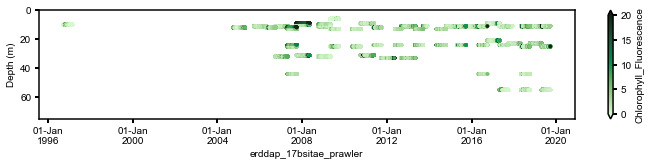

In [11]:
fig, ax = plt.subplots(figsize=(12, 2))
parameter = 'Chlorophyll_Fluorescence'
for dfn, df in dfs.items():
    if ('final' in dfn) and (not np.isnan(df['Chlorophyll_Fluorescence']).all()) and (not 'itae' in dfn):
        print(dfn)
        df[parameter][df[parameter] >= 1e34] = np.nan
        try:
            cs = ax.scatter(df.index, df['depth'], s=15, c=df[parameter], 
                        marker='o', edgecolor='none', vmin=0, vmax=20, cmap=cmocean.cm.algae)
        except:
            pass

    ax.set_ylim([0,75])
    ax.invert_yaxis()
    #ax.set_xlim(df.index[0], df.index[-1])
    xfmt = mdates.DateFormatter('%d-%b\n%Y')
    ax.xaxis.set_major_formatter(xfmt)
    ax.set_xlabel(dfn)

cbar = fig.colorbar(cs, orientation='vertical', extend='both')
cbar.ax.set_ylabel(parameter)
ax.set_ylabel('Depth (m)')



** now get just chlor for export (many rows have other variables but not chlorophyl (as it has multiple depths and the like) **

In [43]:
from requests.exceptions import HTTPError

dfs = {}
for dataset_id in df['Dataset ID'].values:
    print(dataset_id)
    try:
        d = ERDDAP(server=server_url,
            protocol='tabledap',
            response='csv',
        )
        d.variables = ['time','depth','Chlorophyll_Fluorescence']

        d.dataset_id=dataset_id
    except HTTPError:
        print('Failed to generate url {}'.format(dataset_id))

    try:
        df_m = d.to_pandas(
                    index_col='time (UTC)',
                    parse_dates=True,
                    skiprows=(1,)  # units information can be dropped.
                    )
        df_m.sort_index(inplace=True)
        df_m.columns = [x[1].split()[0] for x in enumerate(df_m.columns)]
        df_m.dropna(inplace=True) #placing it here drops na values prior to qc of relevant datastreams
        
        #-9999 and 1e35 are missing values... but erddap doesn't catch the -9999 yet 
        #and some 1e35 are off a bit
        df_m['depth'][(df_m.depth == -9999)] = np.nan # only in pressure field
        dfs.update({dataset_id:df_m})
    except:
        pass


datasets_Mooring_02bs2c_final
datasets_Mooring_03bs2c_final
datasets_Mooring_04bs2c_final
datasets_Mooring_05bs2c_final
datasets_Mooring_06bs2c_final
datasets_Mooring_07bs2c_final
datasets_Mooring_08bs2c_final
datasets_Mooring_11bs2c_final
datasets_Mooring_12bs2c_final
datasets_Mooring_13bs2c_final
datasets_Mooring_14bs2c_final
datasets_Mooring_15bs2c_final
datasets_Mooring_16bs2c_final
datasets_Mooring_17bs2c_final
datasets_Mooring_18bs2c_final
datasets_Mooring_96bs2a_final
datasets_Mooring_96bs2b_final
datasets_Mooring_96bs2c_final
datasets_Mooring_97bs2a_final
datasets_Mooring_97bs2b_final
datasets_Mooring_97bs2c_final
datasets_Mooring_98bs2a_final
datasets_Mooring_98bs2b_final
datasets_Mooring_98bs2c_final
datasets_Mooring_99bs2a_final
datasets_Mooring_99bs2c_final
datasets_Mooring_14bs2c_preliminary
datasets_Mooring_15bs2c_preliminary
datasets_Mooring_16bs2c_preliminary
datasets_Mooring_17bs2c_preliminary
datasets_Mooring_18bs2c_preliminary
datasets_Mooring_01bs2c_final
datasets_M

In [47]:
for dfn, df in dfs.items():
    if ('final' in dfn) and (not np.isnan(df['Chlorophyll_Fluorescence']).all()) and (not 'itae' in dfn):
        dfc=df.copy()
        dfc['depth'][dfc['depth']>20] = np.nan
        dfc.dropna(inplace=True)
        dfc.to_csv(dfn+'.csv')
